<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[ADABoost](#ada)**
2. **[Gradient Boosting](#gb)**
3. **[Extreme Gradient Boosting (XGBoost)](#xgb)**

**Import the required libraries**

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
pd.set_option('Display.max_columns', None)

pd.set_option('Display.max_rows', None)

#### Load the csv file

In [138]:
df = pd.read_csv('emp_attrition.csv')

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [139]:
df.shape

(1580, 18)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1580 non-null   int64 
 1   Attrition                1580 non-null   object
 2   BusinessTravel           1580 non-null   object
 3   Department               1580 non-null   object
 4   DistanceFromHome         1580 non-null   int64 
 5   EducationField           1580 non-null   object
 6   EnvironmentSatisfaction  1580 non-null   int64 
 7   Gender                   1580 non-null   object
 8   JobInvolvement           1580 non-null   int64 
 9   JobLevel                 1580 non-null   int64 
 10  JobRole                  1580 non-null   object
 11  JobSatisfaction          1580 non-null   int64 
 12  MonthlyIncome            1580 non-null   int64 
 13  NumCompaniesWorked       1580 non-null   int64 
 14  OverTime                 1580 non-null  

In [141]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

**Data Preparation**

**Remove the outlier using IQR method, if present.**

In [142]:
cat_var = df.select_dtypes('object')

cat_var = cat_var.drop('Attrition', axis = 1)

cat_var.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object')

In [143]:
num_var = df.select_dtypes(np.number)

num_var.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

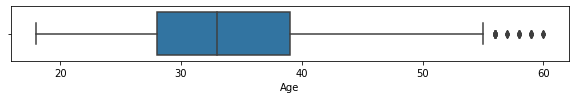

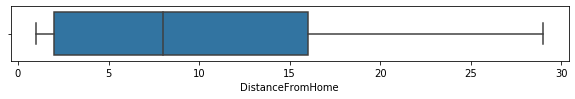

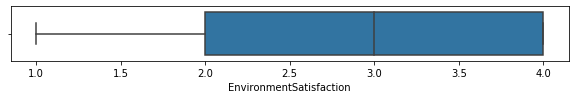

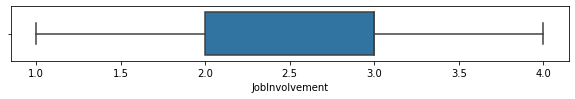

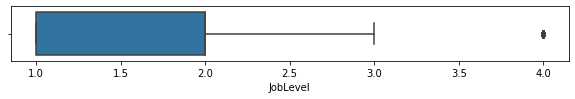

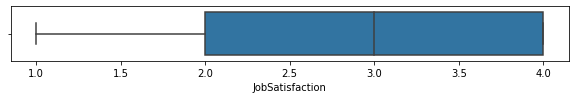

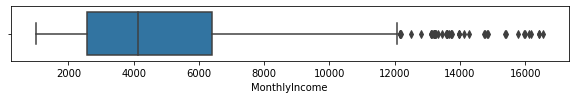

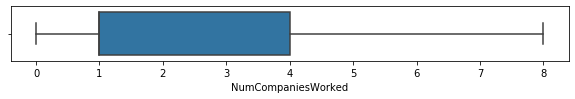

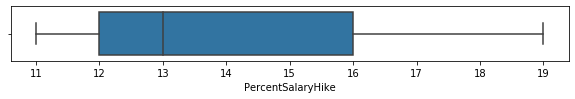

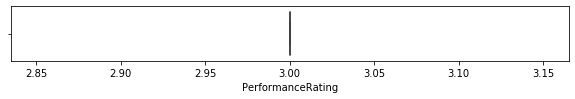

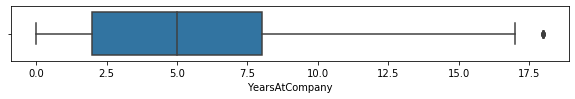

In [144]:
for i in num_var.columns:
    plt.figure(figsize = (10,1))
    sns.boxplot(df[i])
    plt.show()

In [145]:
for i in num_var.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    df[i] = df[i][(df[i] > (q1 - (1.5 * iqr))) & (df[i] < (q3 + (1.5 * iqr)))]

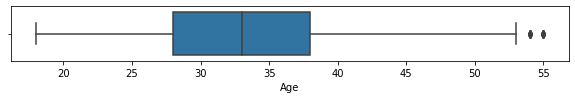

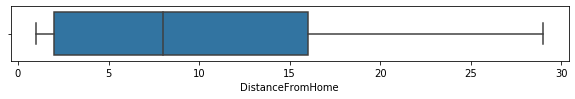

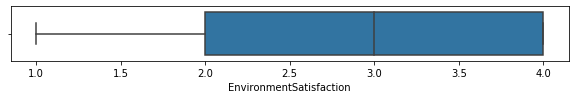

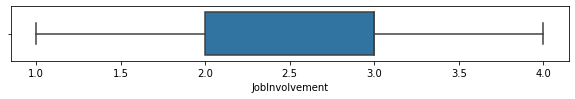

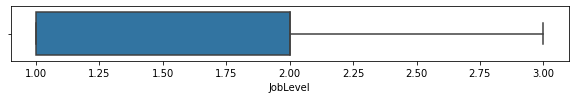

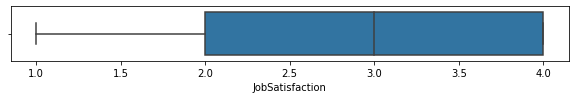

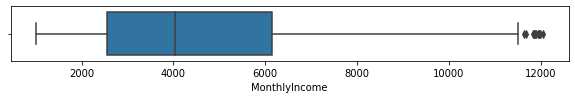

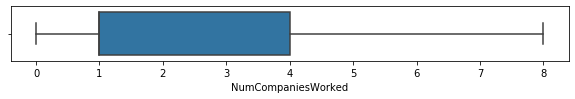

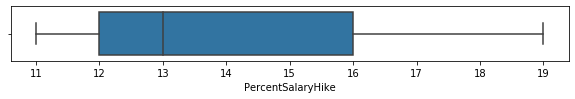

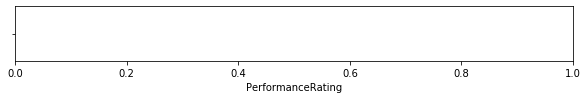

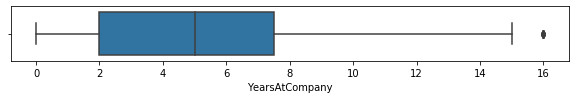

In [146]:
for i in num_var.columns:
    plt.figure(figsize = (10,1))
    sns.boxplot(df[i])
    plt.show()

In [147]:
df.isnull().sum()

Age                          36
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
JobInvolvement                0
JobLevel                     38
JobRole                       0
JobSatisfaction               0
MonthlyIncome                53
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating          1580
YearsAtCompany               21
dtype: int64

In [148]:
df.shape

(1580, 18)

In [149]:
df = df.dropna(subset = ['Age','JobLevel','MonthlyIncome','YearsAtCompany'])

In [150]:
df.shape

(1479, 18)

In [151]:
df.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating          1479
YearsAtCompany                0
dtype: int64

In [152]:
df = df.drop('PerformanceRating', axis = 1)

In [153]:
df.shape

(1479, 17)

In [154]:
df['Attrition'].value_counts()

No     811
Yes    668
Name: Attrition, dtype: int64

In [155]:
df['Attrition'] = df['Attrition'].map({'No' : 0, 'Yes' : 1})

**Encode the categorical variables.**

In [156]:
df = pd.get_dummies(df, columns = cat_var.columns, drop_first = True)

In [157]:
df.shape

(1479, 30)

In [158]:
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33.0,1,3,1,3,1.0,1,3348.0,1,11,10.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,32.0,1,4,4,1,3.0,4,10400.0,1,11,14.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,40.0,1,9,4,3,1.0,1,2018.0,3,14,5.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,42.0,0,7,2,4,2.0,2,2372.0,6,16,1.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,43.0,0,27,3,3,3.0,1,10820.0,8,11,8.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Convert the Age variable into categorical by dividing it in the ranges; 18-30, 31-40, 41-50, 51-60.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [159]:
for i in range(df.shape[0]):
    if df.Age.iloc[i]>=18 and df.Age.iloc[i]<=30:
        df.Age.iloc[i] = "A18-30"
    elif(df.Age.iloc[i]>=31 and df.Age.iloc[i]<=40):
        df.Age.iloc[i] = "A31-40"
    elif(df.Age.iloc[i]>=41 and df.Age.iloc[i]<=50):
        df.Age.iloc[i] = "A41-50"
    else:
        df.Age.iloc[i] = "A51-60"

C:\Users\abhin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [160]:
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,A31-40,1,3,1,3,1.0,1,3348.0,1,11,10.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,A31-40,1,4,4,1,3.0,4,10400.0,1,11,14.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,A31-40,1,9,4,3,1.0,1,2018.0,3,14,5.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,A41-50,0,7,2,4,2.0,2,2372.0,6,16,1.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,A41-50,0,27,3,3,3.0,1,10820.0,8,11,8.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Employee from which age category has the highest salary?.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [161]:
df.groupby('Age')['MonthlyIncome'].max()

Age
A18-30    11935.0
A31-40    12061.0
A41-50    11957.0
A51-60    10976.0
Name: MonthlyIncome, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Dummy encode the categorical variable "Age".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [162]:
df["Age"].value_counts()

A31-40    636
A18-30    569
A41-50    227
A51-60     47
Name: Age, dtype: int64

In [163]:
df = pd.get_dummies(df, columns = ['Age'], drop_first = True)

In [164]:
df.head()

,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,Age_A31-40,Age_A41-50,Age_A51-60
0,1,3,1,3,1.0,1,3348.0,1,11,10.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,1,4,4,1,3.0,4,10400.0,1,11,14.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,1,9,4,3,1.0,1,2018.0,3,14,5.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0,7,2,4,2.0,2,2372.0,6,16,1.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,0,27,3,3,3.0,1,10820.0,8,11,8.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [165]:
df.shape

(1479, 32)

<a id="ada"> </a>
## 1. ADABoost

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a adaboost model with 40 number of estimators to predict whether or not an employee will leave the company based on all the dummy encoded categorical features only. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [168]:
X = df.iloc[:,10:]

y = df['Attrition']

X.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,Age_A31-40,Age_A41-50,Age_A51-60
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [172]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada.fit(X_train, y_train)

y_test_pred = ada.predict(X_test)

from sklearn.metrics import accuracy_score

print('Accuracy :',accuracy_score(y_test, y_test_pred))

Accuracy : 0.7207207207207207


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a adaboost full model with 40 number of estimators to predict if an employee will leave the company. Generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [173]:
X = df.drop('Attrition', axis = 1)

y = df['Attrition']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [174]:
X_train.shape, X_test.shape

((1035, 31), (444, 31))

In [176]:
y_train.shape, y_test.shape

((1035,), (444,))

In [177]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada.fit(X_train, y_train)

y_test_pred = ada.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       247
           1       0.75      0.72      0.73       197

    accuracy                           0.77       444
   macro avg       0.77      0.76      0.76       444
weighted avg       0.77      0.77      0.77       444



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.  Find the area under the receiver operating characteristic curve for full model built in question 5. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

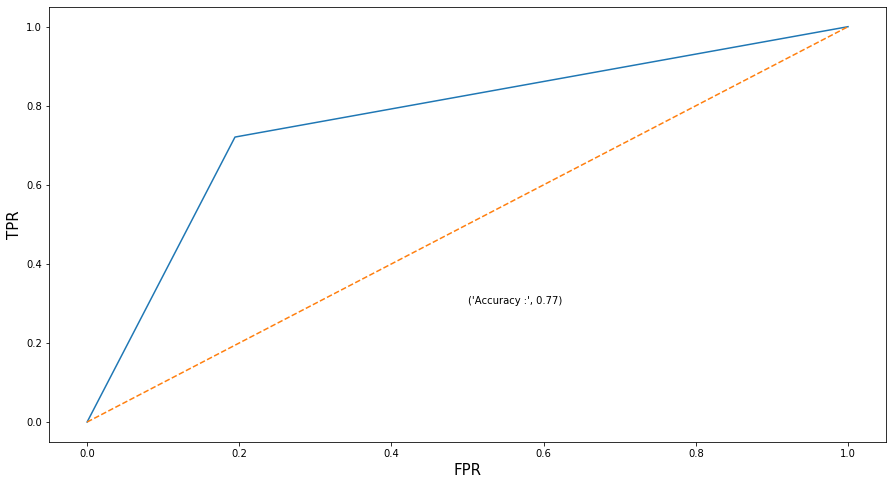

In [182]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (15,8))

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, '--')

plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)

plt.text(x = 0.5, y = 0.3, s = ('Accuracy :',round(accuracy_score(y_test, y_test_pred),2)))

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot a confusion matrix for the full model built above.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

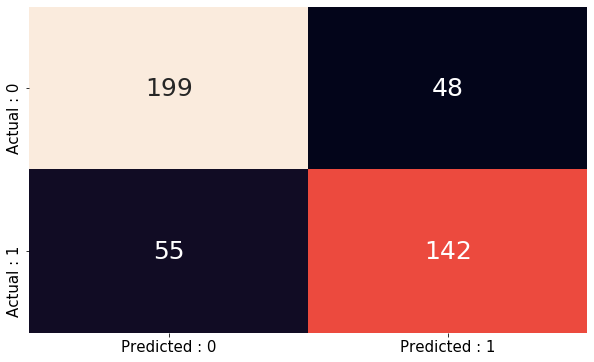

In [184]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

conf_m = pd.DataFrame(cm, index = ['Actual : 0','Actual : 1'], columns = ['Predicted : 0', 'Predicted : 1'])

plt.figure(figsize = (10,6))

sns.heatmap(conf_m, annot = True, cbar = False, annot_kws = {'size' : 25}, fmt = 'd')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [187]:
total = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]

specificity = cm[0,0] / (cm[0,0] + cm[0,1])
print('Specificity :',round(specificity,2))

sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
print('Sensitivity :',round(sensitivity,2))

misclassified = (cm[0,1] + cm[1,0]) / total
print('% misclassified :',round(misclassified,2) * 100)

correct_classified = (cm[0,0] + cm[1,1]) / total
print('% correctly classified :',round(correct_classified,2) * 100)

Specificity : 0.81
Sensitivity : 0.72
% misclassified : 23.0
% correctly classified : 77.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the best value of hyperparameters "n_estimators" and "learning_rate" for the adaboost full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

       n_estimators = [100, 120, 150, 200, 250, 300, 350],
       learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015]         

In [189]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
         'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015]}

gsearch = GridSearchCV(ada, param_grid = params, cv = 3, scoring = 'roc_auc', n_jobs = -1)

gsearch.fit(X, y)

print('The best value of hyperparameters are :', gsearch.best_params_)

The best value of hyperparameters are : {'learning_rate': 0.15, 'n_estimators': 350}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a adaboost model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [191]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(**gsearch.best_params_, random_state = 10)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(ada, X = X_train, y = y_train, cv = 10, scoring = 'roc_auc', n_jobs = -1)

print('The Average ROC-AUC score of 10 fold cross validation is :',round(scores.mean(),2))

The Average ROC-AUC score of 10 fold cross validation is : 0.84


<a id="gb"> </a>
## 2. Gradient Boosting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Build the gradient boosting model 100 estimators and maximum depth 3. Also, find the accuracy score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [193]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, random_state = 10)

gbc.fit(X_train, y_train)

y_test_pred = gbc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Accuracy :',accuracy_score(y_test, y_test_pred))

Accuracy : 0.8536036036036037


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>12. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150, 200, 250, 300, 350],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        max_depth = [2, 3, 4, 5, 6]

In [194]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
         'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015],
         'max_depth' : [2, 3, 4, 5, 6]}

gsearch = GridSearchCV(gbc, param_grid = params, cv = 3, scoring = 'roc_auc', n_jobs = -1)

gsearch.fit(X,y)

print('The best value of hyperparameters are :', gsearch.best_params_)

The best value of hyperparameters are : {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 350}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>13. Build the gradient boosting model and an adaboost model with their best parameters and generate a classification report for both of them. Which model is the best and why?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### GradientBoostingClassifier

In [195]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(**gsearch.best_params_, random_state = 10)

gbc.fit(X_train, y_train)

y_test_pred = gbc.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       247
           1       0.92      0.92      0.92       197

    accuracy                           0.93       444
   macro avg       0.93      0.93      0.93       444
weighted avg       0.93      0.93      0.93       444



#### AdaBoostClassifier

In [196]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
         'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015]}

gsearch = GridSearchCV(ada, param_grid = params, cv = 3, scoring = 'roc_auc', n_jobs = -1)

gsearch.fit(X, y)

gsearch.best_params_

{'learning_rate': 0.15, 'n_estimators': 350}

In [197]:
ada = AdaBoostClassifier(**gsearch.best_params_, random_state = 10)

ada.fit(X_train, y_train)

y_test_pred = ada.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       247
           1       0.77      0.79      0.78       197

    accuracy                           0.80       444
   macro avg       0.80      0.80      0.80       444
weighted avg       0.80      0.80      0.80       444



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Plot the area under the receiver operating characteristic curve for tuned gradient boosting model built in question 13. Also plot a confusion matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [198]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
         'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015],
         'max_depth' : [2, 3, 4, 5, 6]}

gsearch = GridSearchCV(gbc, param_grid = params, cv = 3, scoring = 'roc_auc', n_jobs = -1)

gsearch.fit(X,y)

gbc = GradientBoostingClassifier(**gsearch.best_params_, random_state = 10)

gbc.fit(X_train, y_train)

y_test_pred = gbc.predict(X_test)

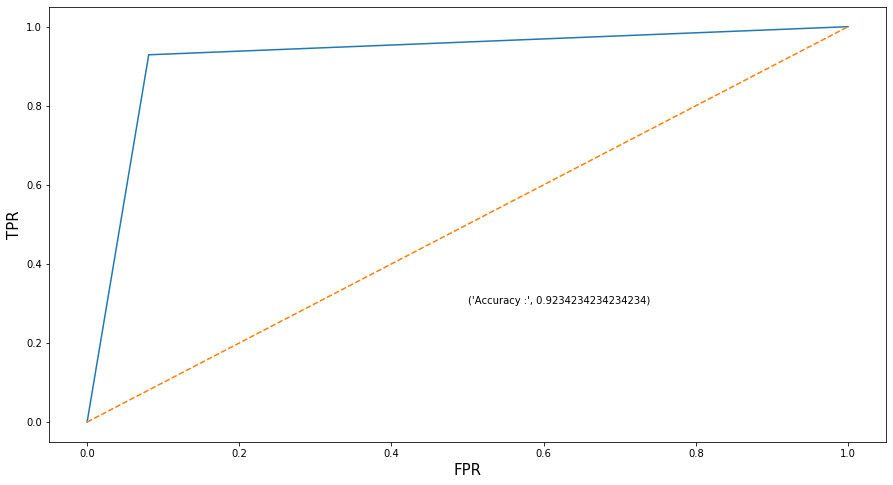

In [199]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

fpr, tpr, threshold = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (15,8))

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, '--')

plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)

plt.text(x = 0.5, y = 0.3, s = ('Accuracy :',accuracy_score(y_test, y_test_pred)))

plt.show()

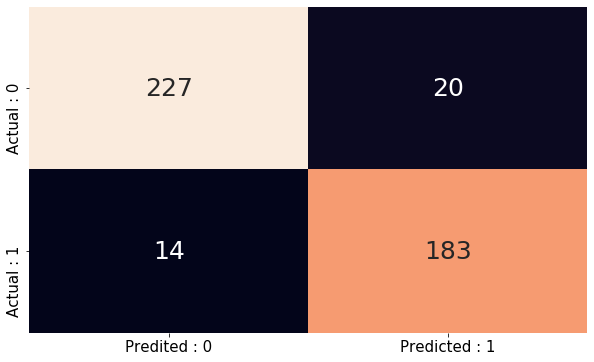

In [201]:
cm = confusion_matrix(y_test, y_test_pred)

conf_m = pd.DataFrame(cm, index = ['Actual : 0', 'Actual : 1'], columns = ['Predited : 0', 'Predicted : 1'])

plt.figure(figsize = (10,6))

sns.heatmap(conf_m, annot = True, cbar = False, annot_kws = {'size' : 25}, fmt = 'd')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGBoost)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification rerport.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [203]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.01, gamma = 2)

xgb.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score, classification_report

y_test_pred = xgb.predict(X_test)

print('AUC score :', accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

C:\Users\abhin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC score : 0.8265765765765766
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       247
           1       0.80      0.81      0.81       197

    accuracy                           0.83       444
   macro avg       0.82      0.83      0.82       444
weighted avg       0.83      0.83      0.83       444



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>16. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the extreme gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        gamma = [2, 3, 4, 5, 6],
        max_depth = [2, 3, 4, 5, 6]

In [205]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 120, 150],
    'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
    'gamma' : [2, 3, 4, 5, 6],
    'max_depth' : [2, 3, 4, 5, 6]}

gsearch = GridSearchCV(xgb, param_grid = params, cv = 3, scoring = 'roc_auc', n_jobs = -1)

gsearch.fit(X, y)

print('The best value of hyperparameters are :', gsearch.best_params_)

C:\Users\abhin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The best value of hyperparameters are : {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>17. Plot the connfusion matrix for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\abhin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


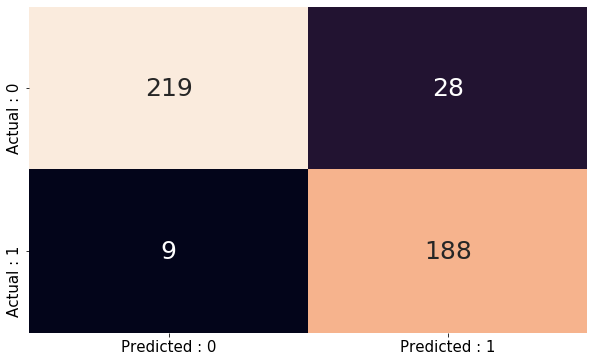

In [206]:
from xgboost import XGBClassifier

xgb = XGBClassifier(**gsearch.best_params_)

xgb.fit(X_train, y_train)

y_test_pred = xgb.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

conf_m = pd.DataFrame(cm, index = ['Actual : 0', 'Actual : 1'], columns = ['Predicted : 0','Predicted : 1'])\

plt.figure(figsize = (10,6))

sns.heatmap(conf_m, annot = True, cbar = False, annot_kws = {'size' : 25}, fmt = 'd')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>18. Plot the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

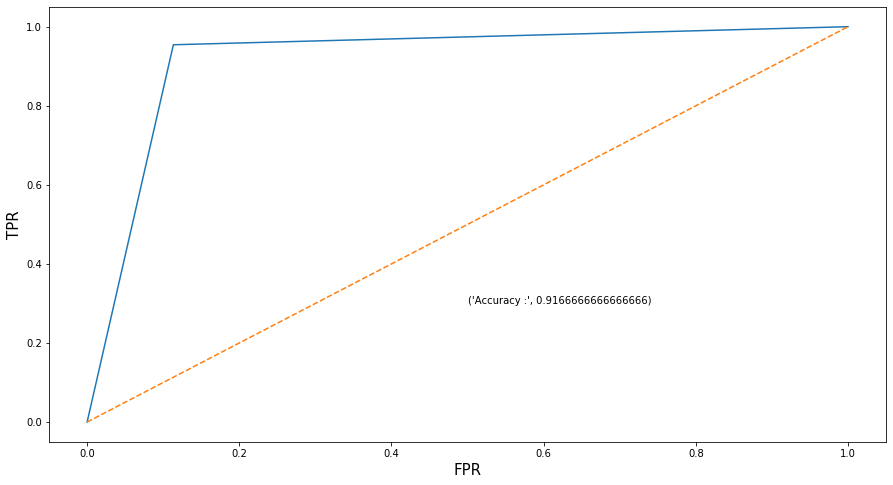

In [207]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (15,8))

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, '--')

plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)

plt.text(x = 0.5, y = 0.3, s = ('Accuracy :',accuracy_score(y_test, y_test_pred)))

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>19. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Adaboost model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

base_learner = [('DecisionTree',DecisionTreeClassifier()),
               ('RandomForest',RandomForestClassifier())]

from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = base_learner, final_estimator = AdaBoostClassifier(random_state = 10))

stack.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                               ('RandomForest', RandomForestClassifier())],
                   final_estimator=AdaBoostClassifier(random_state=10))

In [218]:
y_test_prob = stack.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score

print('AUC score:', roc_auc_score(y_test, y_test_pred))

AUC score: 0.9441624365482233


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>20. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Gradient Boosting model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

base_learner = [('DecisionTree',DecisionTreeClassifier()),
               ('RandomForest',RandomForestClassifier())]

stack = StackingClassifier(estimators = base_learner, final_estimator = GradientBoostingClassifier(random_state = 10))

stack.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                               ('RandomForest', RandomForestClassifier())],
                   final_estimator=GradientBoostingClassifier(random_state=10))

In [216]:
y_test_prob = stack.predict_proba(X_test)[:,1]

print('AUC score :', roc_auc_score(y_test, y_test_prob))

AUC score : 0.9842372428533263
